<a href="https://colab.research.google.com/github/vsasvipul0605/Breast-Cancer-ANN-Model/blob/main/Breast_Cancer_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
upload = files.upload()

Saving breast_cancer_dataset.csv to breast_cancer_dataset.csv


In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [82]:
dataset = pd.read_csv('breast_cancer_dataset.csv')

In [83]:
dataset.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [84]:
X = dataset.iloc[:, 2:-1]
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [85]:
X.shape

(569, 30)

In [86]:
y=dataset.iloc[:,1]
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [87]:
y.shape

(569,)

In [88]:
X.isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [89]:
y.value_counts()


B    357
M    212
Name: diagnosis, dtype: int64

In [90]:
import matplotlib.pyplot as plt
import seaborn as sb

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


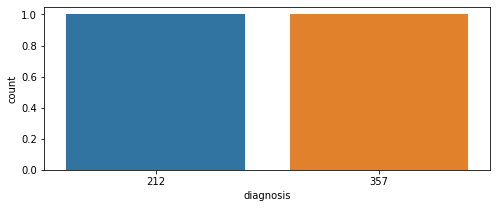

In [91]:
plt.figure(figsize=[8,3])
sb.countplot(y.value_counts())
plt.show()

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [93]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [94]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y_train= lb.fit_transform(y_train)
y_test= lb.fit_transform(y_test)

In [95]:
#ANN MODEL

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [96]:
from tensorflow.keras import initializers

In [97]:
#model = Sequential()
#model.add(Dense(units=9, activation='relu'))
#model.add(Dense(units=50, activation='relu',kernel_initializer=initializers.HeUniform()))
#model.add(Dense(512, activation='relu'))
#model.add(Dense(units=50, activation='relu',kernel_initializer=initializers.GlorotUniform()))
#model.add(Dense(units=1,activation='sigmoid'))


In [98]:
model = Sequential()
model.add(Dense(units=9,kernel_initializer='he_uniform',activation='relu',input_dim=30))
model.add(Dense(units=9,kernel_initializer='he_uniform',activation='relu'))

model.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [99]:
model.compile(optimizer='ADAM',loss='binary_crossentropy',metrics=['accuracy'])

In [100]:
model_history=model.fit(X_train,y_train,batch_size=100,epochs=100,validation_split=0.20)


Epoch 1/100
4/4 [==============================] - 1s 55ms/step - loss: 0.6869 - accuracy: 0.6164 - val_loss: 0.6558 - val_accuracy: 0.6250
Epoch 2/100
4/4 [==============================] - 0s 9ms/step - loss: 0.6465 - accuracy: 0.6258 - val_loss: 0.6117 - val_accuracy: 0.6500
Epoch 3/100
4/4 [==============================] - 0s 7ms/step - loss: 0.6105 - accuracy: 0.6447 - val_loss: 0.5714 - val_accuracy: 0.6750
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 0.5777 - accuracy: 0.6792 - val_loss: 0.5373 - val_accuracy: 0.6750
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 0.5478 - accuracy: 0.6981 - val_loss: 0.5072 - val_accuracy: 0.7000
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 0.5222 - accuracy: 0.7296 - val_loss: 0.4813 - val_accuracy: 0.7500
Epoch 7/100
4/4 [==============================] - 0s 8ms/step - loss: 0.4995 - accuracy: 0.7484 - val_loss: 0.4580 - val_accuracy: 0.7750
Epoch 8/100
4/4 [=========

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


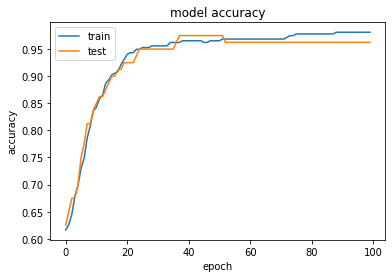

In [101]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

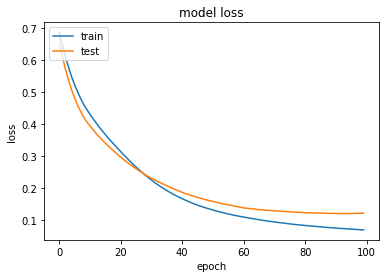

In [102]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [103]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [104]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [105]:
cm

array([[106,   2],
       [  1,  62]])

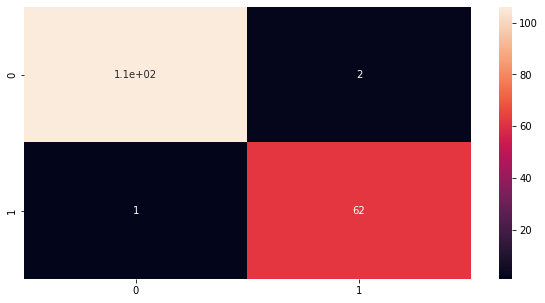

In [106]:
plt.figure(figsize=[10,5])
sb.heatmap(cm,annot=True)
plt.show()

In [107]:
score

0.9824561403508771

In [108]:
model.save('Breast_Cancer_Model.h5')
